<a href="https://colab.research.google.com/github/rinoajayne/CATANAOAN-Portfolio-for-COSC110/blob/main/lab2_titanic_Catanaoan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question #1**
* What are your steps in cleaning the dataset? Why did you choose the algorithm that you used in cleaning the dataset?



**Step 1: Load the data**


*   Loaded the dataset using pandas.read_csv() to inspect the first few rows.

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 2: Understand the data**

*  Checked the structure with df.info() and df.describe() to identify data types and statistical distributions.

In [ ]:
df.info()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Step 3: Check for Missing Values**
*   Identified missing values using df.isnull().sum() to determine which columns had nulls and how many.


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Step 4: Handle Missing Values**

*   Filled missing values in the "Age" column with the median (because the distribution had outliers and wasn't perfectly normal).
*   Dropped the "Cabin" column due to too many missing values (more than 75%).
*   Dropped rows with missing values in the "Embarked" column (only 2 entries).

In [ ]:
df["Age"].fillna(df["Age"].median(), inplace=True)

<ipython-input-252-2097741607>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)


In [ ]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [ ]:
df.drop(columns=["PassengerId","Cabin"], inplace=True)


*   Median imputation is preferred for skewed data or when outliers are present (e.g., Age).
*   Dropping columns like "Cabin" with excessive null values prevents unreliable imputation.

**Step 5: Remove Duplicates**
*   using df.duplicated().sum() followed by df.drop_duplicates() to ensure unique records.

In [ ]:
df.duplicated().sum()


np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)


**Step 6: Fix Data Types**

*   Changed "Survived" and "Pclass" to categorical data types, since they represent categories rather than continuous values.



In [ ]:
df["Survived"] = df["Survived"].astype("category")


In [ ]:
df["Pclass"] = df["Pclass"].astype("category")


In [ ]:
df["Embarked"] = df["Embarked"].astype("category")

**Step 6.1: Verify Changes**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 51.8+ KB


**Step 7: Change Fare decimal places to hundreths.**

In [ ]:
df['Fare'] = df['Fare'].round(2)


**Step 7.1: Verify Changes**

In [ ]:
df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S


**Step 8: Standardize Column Names**
*   to lowercase using df.columns.str.lower() for consistency and easier access in code.

In [ ]:
df.columns = df.columns.str.lower()


**Step 8.1: Verify Changes**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  891 non-null    category
 1   pclass    891 non-null    category
 2   name      891 non-null    object  
 3   sex       891 non-null    object  
 4   age       891 non-null    float64 
 5   sibsp     891 non-null    int64   
 6   parch     891 non-null    int64   
 7   ticket    891 non-null    object  
 8   fare      891 non-null    float64 
 9   embarked  891 non-null    category
dtypes: category(3), float64(2), int64(2), object(3)
memory usage: 51.8+ KB


**Step 9: Save the Cleaned Dataset**
*  to a new CSV file (titanic_cleaned.csv).

In [ ]:
df.to_csv("titanic_cleaned.csv", index=False)

# **QUESTION #2**
*   Create at least two (2) basic data analysis on two (2) columns in the dataset. Be creative and critical in deriving the insights on the data. You can show the visualization used to derive the insights.

**Survivors and Non-Survivors**

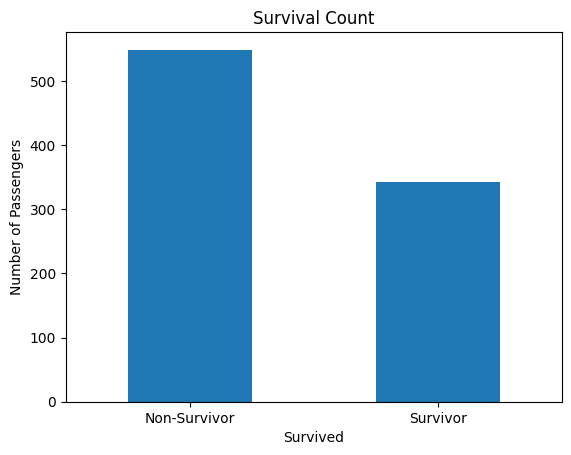

In [ ]:
import matplotlib.pyplot as plt

ax = df["survived"].value_counts().plot(kind="bar")
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Number of Passengers")
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Survivor', 'Survivor'], rotation=0)
plt.show()

In [ ]:
df['survived'].value_counts()


,count
survived,
0,549
1,342


Analysis 1: Age Distribution of Survivors vs. Non-Survivors

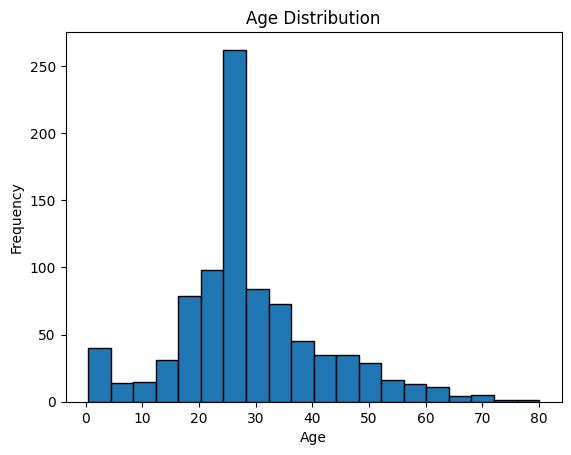

In [ ]:
df["age"].plot(kind="hist", bins=20, edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

*   Most survivors were younger passengers, particularly children and young adults.
*   Older passengers had lower survival rates.
*   This indicates age may have influenced evacuation priority or survivability.


In [ ]:
df.groupby(['survived', 'sex'], observed=True).size()


survived  sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

Analysis 2: Survival Count by Gender

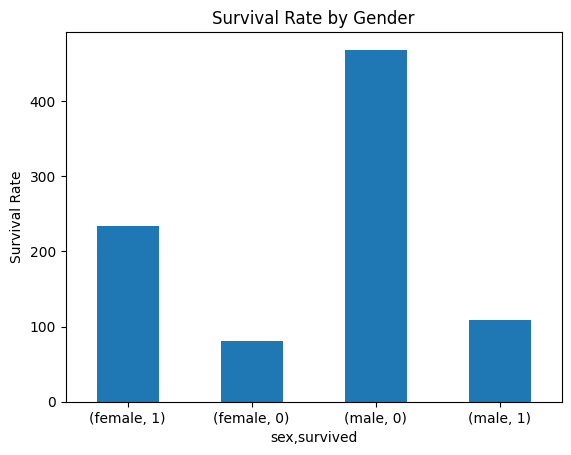

In [ ]:
df.groupby("sex")["survived"].value_counts().plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

*   Females had a much higher survival rate (74%) than males (19%).
*   This suggests that "women and children first" was followed during evacuation
*   Gender played a significant role in survival outcomes.